In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def format_truth_table(path,n_top):

    # open the file and format 

    df_sweep = pd.read_csv(path)
    df_sweep['Unnamed: 0'] = [0,9]*int(len(df_sweep.index)/len([0,9]))
    df_sweep['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep.index)/len([0,0,3,3,5,5,7,7,9,9]))
    df_sweep.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

    df_heat = df_sweep.copy()
    for l,i in enumerate(df_heat.iloc):
        c = i.param
        df_heat.loc[l,'n'] = int(re.findall(r'\d+',c)[0])
        df_heat.loc[l,'threshold'] = float(re.findall(r"[-+]?\d*\.*\d+",c)[1])

    # compute the f1 score 

    f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))

    df_heat['f1'] = f1

    #rank

    df_heat['ranking'] = df_heat['f1'].rank(method='first',ascending=False)
    df_heat = df_heat.sort_values(by='ranking')

    # Get the n_top top parameters 

    best_params = [df_heat.iloc[0].param] #list of the best params

    for i in df_heat.iloc:
        if i.param not in best_params :
            best_params.append(i.param)
            if len(best_params) >= n_top: # check that you only take n_top
                break                                                    

    df_best_params = pd.DataFrame()

    for l,i in enumerate(best_params):
        df = df_heat[df_heat.param == i].copy(deep=True)
        df.loc[:,'top'] = l+1
        df_best_params = pd.concat([df_best_params,df])

    df_best_params.reset_index(inplace=True,drop=True)
    df_best_params

    return df_best_params

def plot_results(df:pd.DataFrame):
    fig,ax = plt.subplots(1,3,figsize=(17,5))
    sns.set_palette('colorblind')

    sns.boxplot(data=df,x='top',y='sensitivity',showmeans=True,ax= ax[0])
    sns.boxplot(data=df,x='top',y='precision',showmeans=True,ax= ax[1])
    sns.boxplot(data=df,x='top',y='f1',showmeans=True,ax= ax[2])
    ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
    ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
    ax[2].set_ylabel(r'F1 score $2*\frac{precision*sensitivity}{precision+sensitivity}$')
    fig.supxlabel('Top20 best parameters for f1 score')
    for ax in ax:
        ax.set_xlabel('')

    return fig

# Sweep on clean images

In [3]:
df_clean = format_truth_table("../results/final/clean/final_hmax_clean.csv",10)

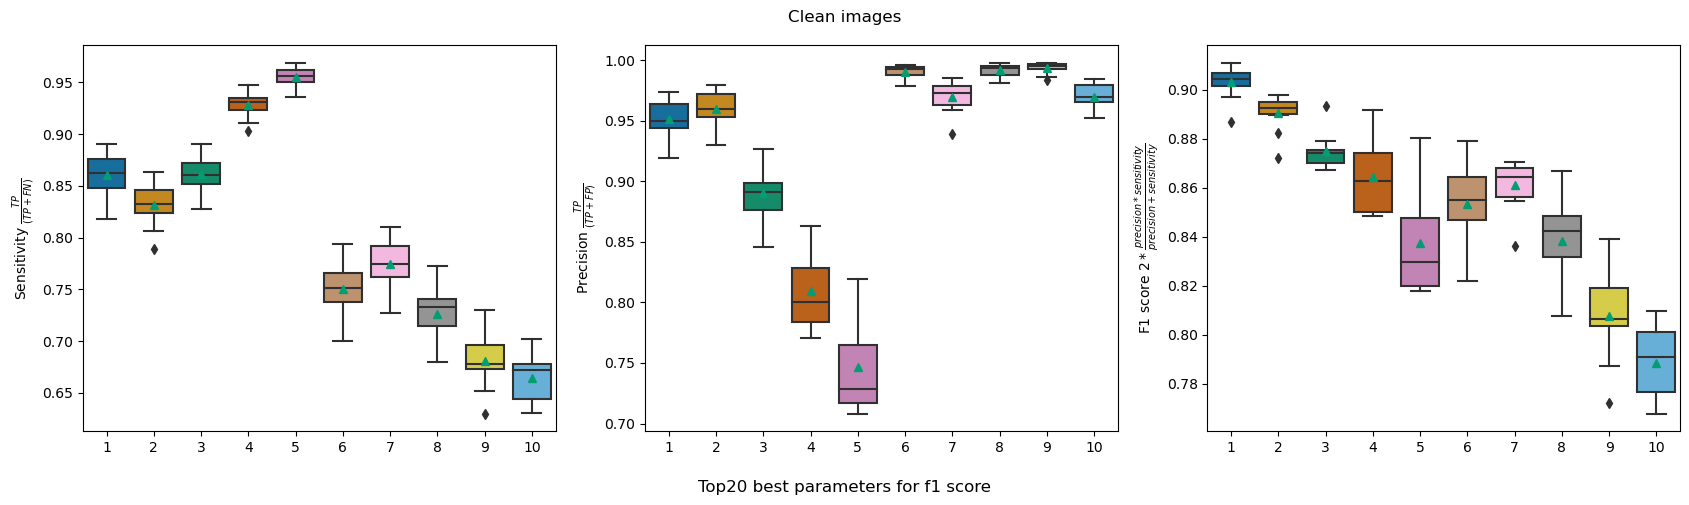

In [95]:
fig = plot_results(df_clean)
fig.suptitle('Clean images')
plt.tight_layout()
plt.savefig('../results/plots/parameter_sweep_clean.png',dpi=300)

# Sweep on denoised images

In [4]:
df_denoised = format_truth_table("../results/final/denoised/final_hmax_denoised.csv",10)

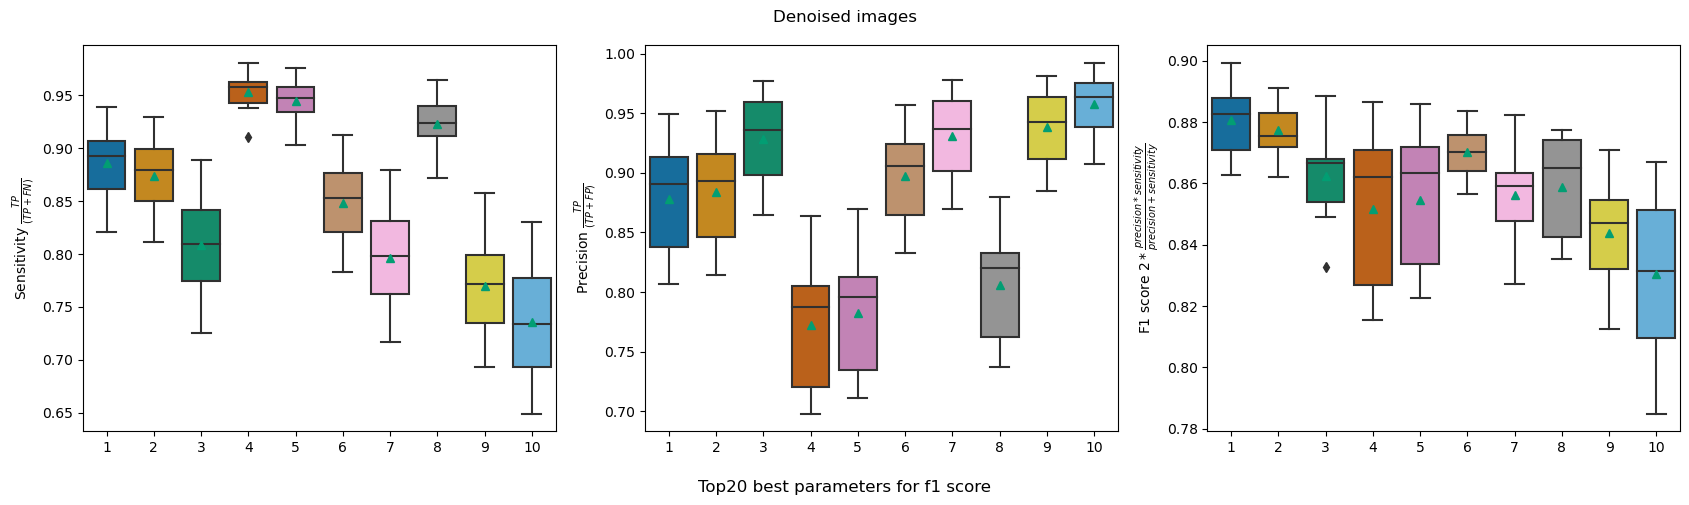

In [94]:
fig = plot_results(df_denoised)
fig.suptitle('Denoised images')
plt.tight_layout()
plt.savefig('../results/plots/parameter_sweep_denosied.png',dpi=300)

# Sweep on Noisy images

In [5]:
df_noisy = format_truth_table("../results/final/noisy/final_hmax_noisy.csv",10)
df_noisy

/scratch/louaness/ipykernel_55614/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top
0,7,9,0.904720,0.002262,0.697323,0.009259,0.649840,n_2_threshold_0.5,2.0,0.5,0.787597,1.0,1
1,1,0,0.882705,0.002326,0.706164,0.007246,0.645807,n_2_threshold_0.5,2.0,0.5,0.784627,2.0,1
2,5,9,0.854073,0.002717,0.722180,0.006098,0.643098,n_2_threshold_0.5,2.0,0.5,0.782609,3.0,1
3,1,9,0.828139,0.002985,0.735759,0.005155,0.638546,n_2_threshold_0.5,2.0,0.5,0.779221,5.0,1
4,9,9,0.802285,0.003215,0.746525,0.004425,0.630780,n_2_threshold_0.5,2.0,0.5,0.773401,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,0,1.000000,0.001028,0.310638,1.000000,0.311127,n_4_threshold_0.5,4.0,0.5,0.474026,99.0,10
96,3,0,0.995349,0.000979,0.295580,0.333333,0.295658,n_4_threshold_0.5,4.0,0.5,0.455804,105.0,10
97,3,9,0.989333,0.001095,0.289166,0.200000,0.288820,n_4_threshold_0.5,4.0,0.5,0.447527,110.0,10
98,7,0,1.000000,0.000833,0.280744,1.000000,0.281175,n_4_threshold_0.5,4.0,0.5,0.438407,115.0,10


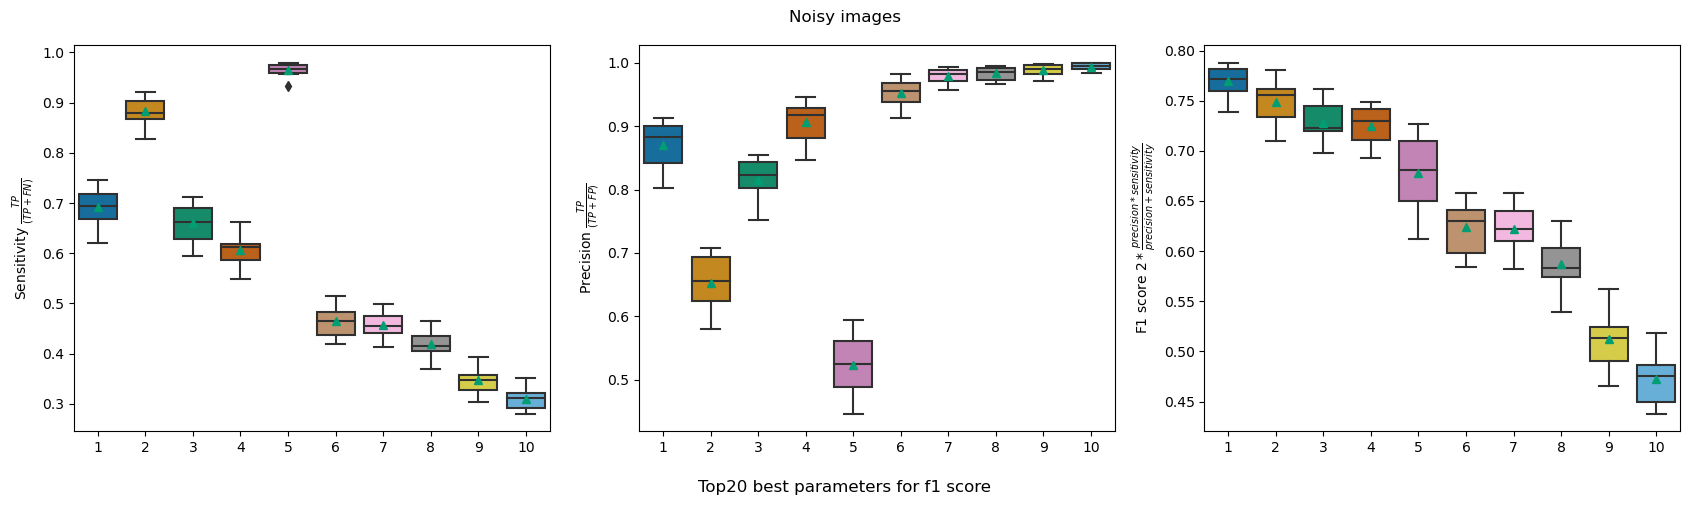

In [93]:
fig = plot_results(df_noisy)
fig.suptitle('Noisy images')
plt.tight_layout()
plt.savefig('../results/plots/parameter_sweep_noisy.png',dpi=300)

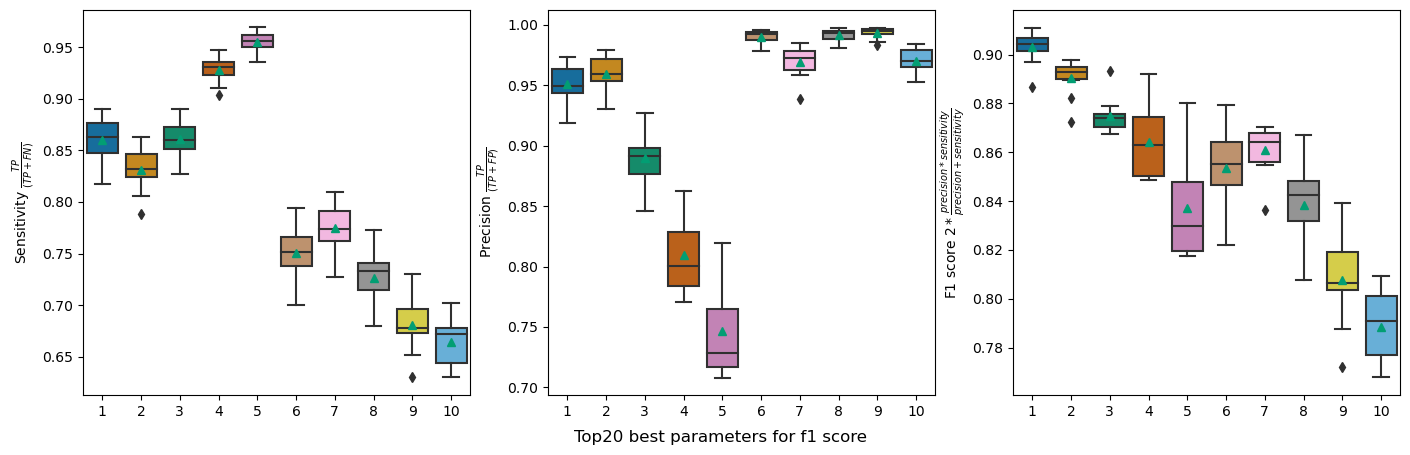

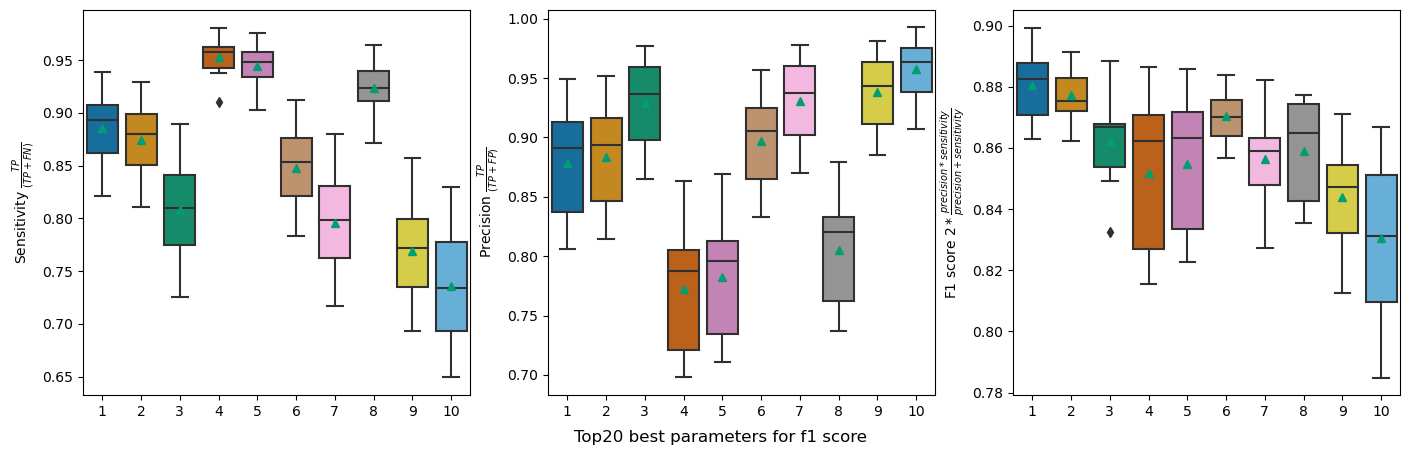

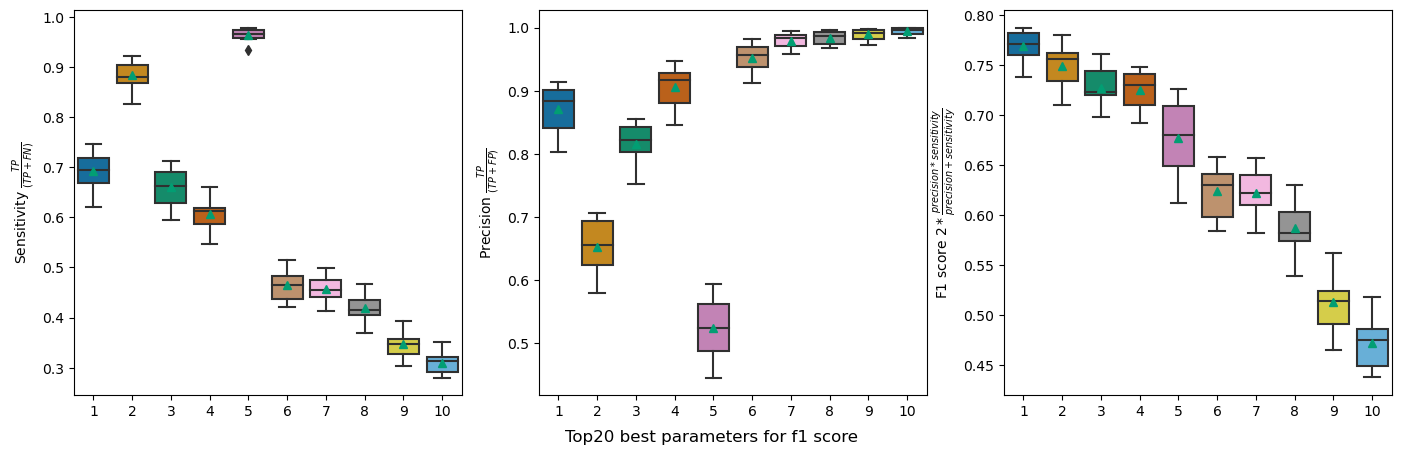

In [63]:
plot_results(df_clean)
plt.show()
plot_results(df_denoised)
plt.show()
plot_results(df_noisy)
plt.show()

In [6]:
df_clean_opt = df_clean[(df_clean.top == 1) & (df_clean.Frame == 0)].copy()
df_denoised_opt = df_denoised[(df_denoised.top == 1)&(df_denoised.Frame == 0)].copy()
df_noisy_opt = df_noisy[(df_noisy.top == 1)&(df_noisy.Frame == 0)].copy()

for i,j in zip([df_clean_opt,df_noisy_opt,df_denoised_opt],['Clean','Noisy','Denoised']):
    i['type'] = [j]*len(i)


df_optimal = pd.concat([df_noisy_opt,df_denoised_opt,df_clean_opt])



In [6]:
df_clean_opt = df_clean[(df_clean.top == 1)].copy()
df_denoised_opt = df_denoised[(df_denoised.top == 1)].copy()
df_noisy_opt = df_noisy[(df_noisy.top == 1)].copy()

for i,j in zip([df_clean_opt,df_noisy_opt,df_denoised_opt],['Clean','Noisy','Denoised']):
    i['type'] = [j]*len(i)


df_optimal = pd.concat([df_noisy_opt,df_denoised_opt,df_clean_opt])

In [7]:
df_optimal.rename(columns={'f1':'F1 score'},inplace=True)

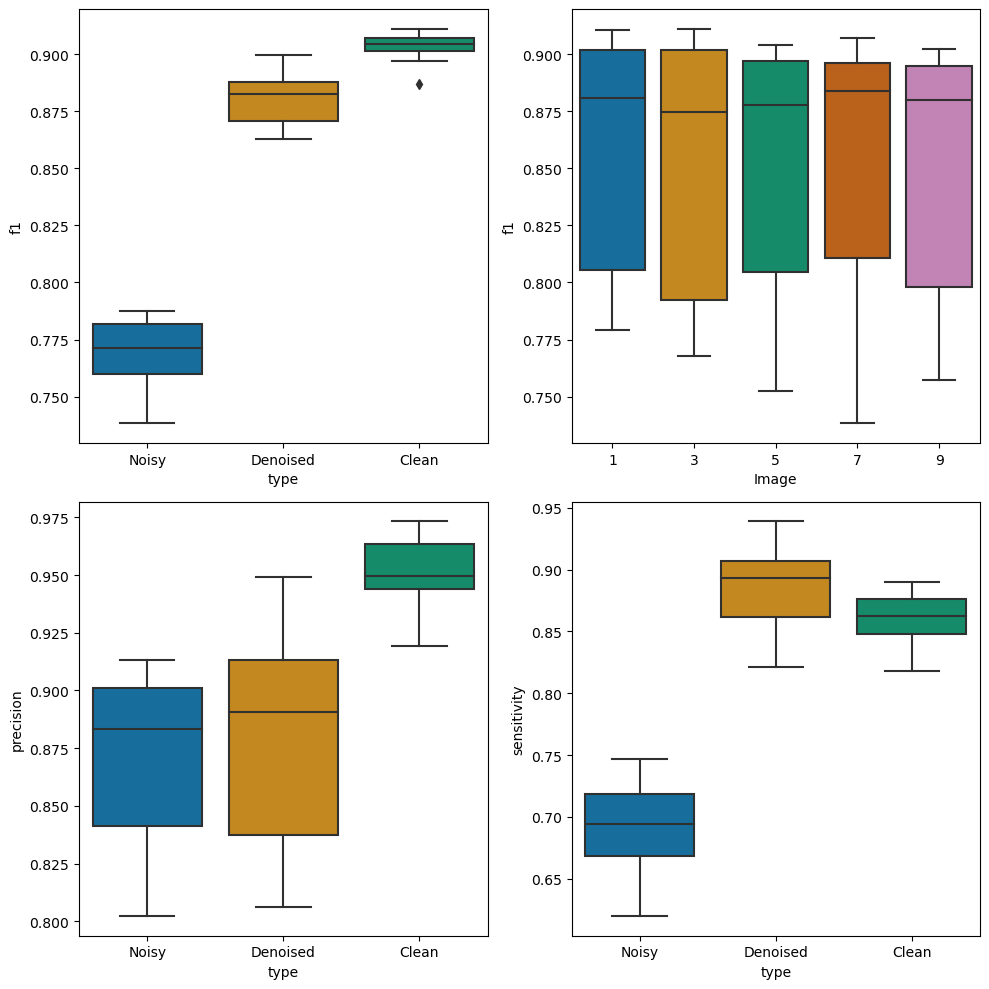

In [91]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

sns.boxplot(data=df_optimal,x='type',y='precision',ax = ax[2])
sns.boxplot(data=df_optimal,x='Image',y='f1',ax = ax[1])
sns.boxplot(data=df_optimal,x='type',y='f1',ax = ax[0])
sns.boxplot(data=df_optimal,x='type',y='sensitivity',ax = ax[3])

plt.tight_layout()
plt.savefig('../results/plots/parameter_sweep_optimal_parameter_summary.png',dpi=300)

In [15]:
labels = 15
legend_title = labels +1
sns.set_context("paper", font_scale=2)#rc={"font.size":labels,"axes.titlesize":labels,"axes.labelsize":labels,"legend.fontsize":labels,"legend.title_fontsize":legend_title,""})  

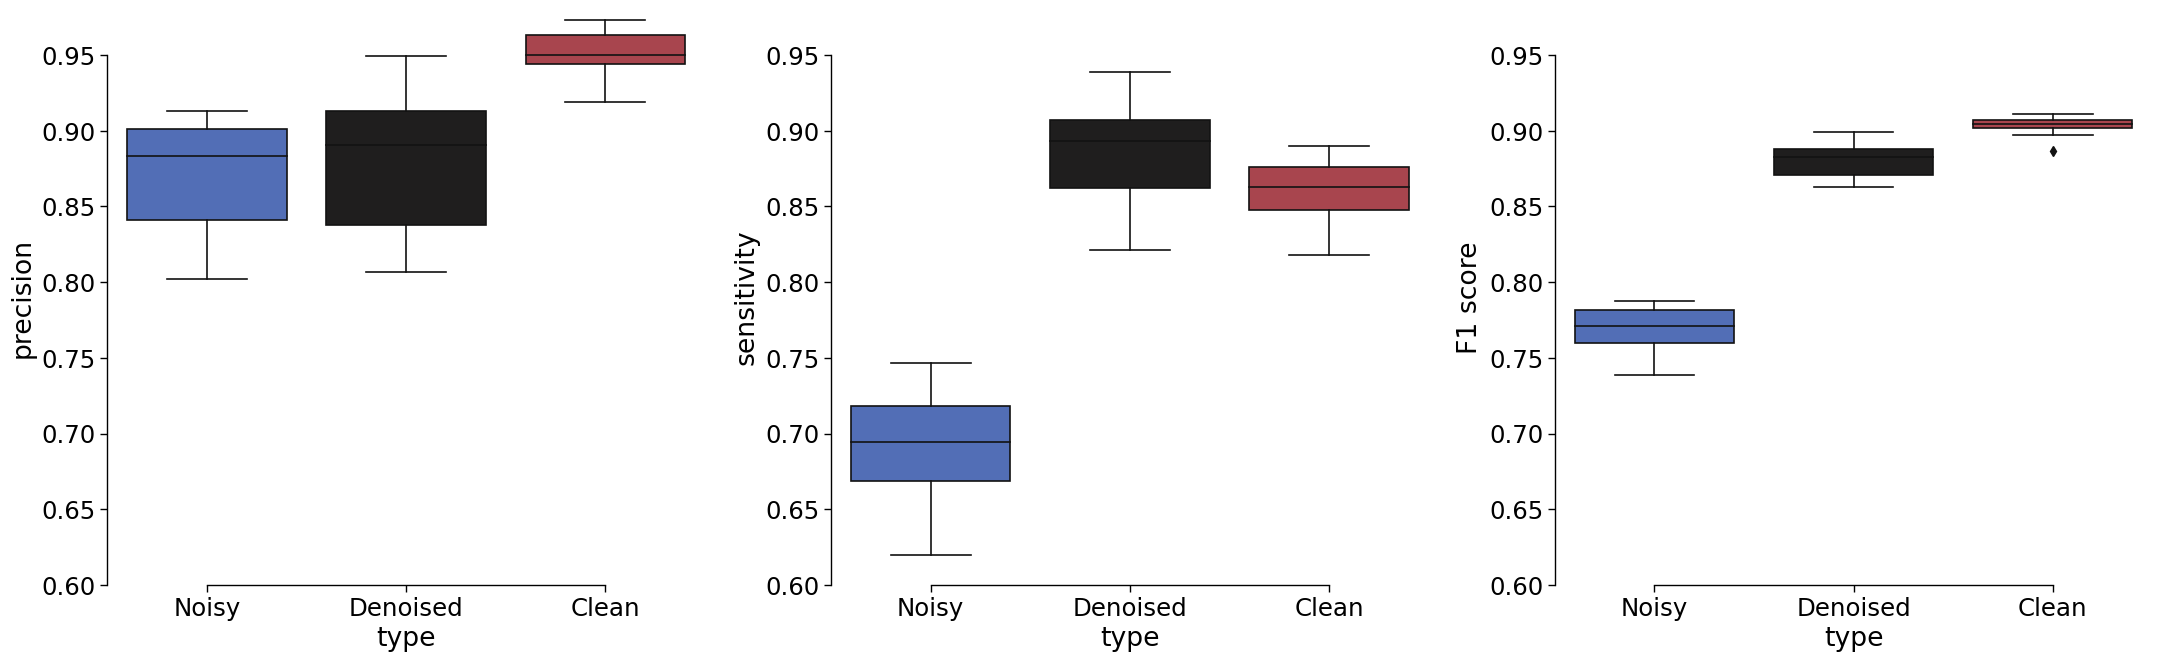

In [22]:
fig,ax = plt.subplots(1,3,figsize=(22,7))
ax = ax.flatten()
palette = 'icefire'
sns.boxplot(data=df_optimal,x='type',y='precision',ax = ax[0],palette=palette)
sns.boxplot(data=df_optimal,x='type',y='F1 score',ax = ax[2],palette=palette)
sns.boxplot(data=df_optimal,x='type',y='sensitivity',ax = ax[1],palette=palette)
for a in ax:
    a.set_ylim(0.60,0.98)

sns.despine(trim=True)
plt.tight_layout()
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/master_thesis/plots/parameter_sweep_optimal_parameter_summary_thesis.pdf',dpi=300,transparent=True)

#only first frame

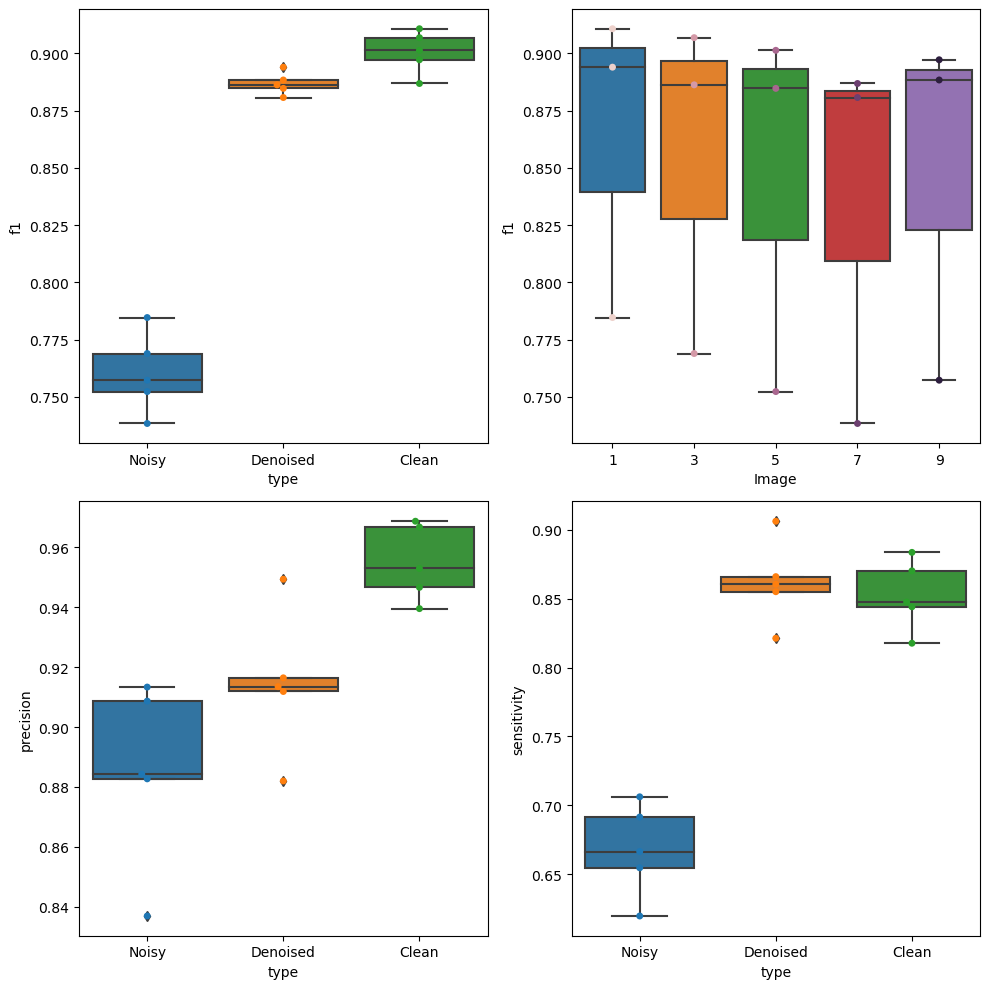

In [15]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

sns.boxplot(data=df_optimal,x='type',y='precision',ax = ax[2])
sns.boxplot(data=df_optimal,x='Image',y='f1',ax = ax[1])
sns.boxplot(data=df_optimal,x='type',y='f1',ax = ax[0])
sns.boxplot(data=df_optimal,x='type',y='sensitivity',ax = ax[3])

sns.swarmplot(data=df_optimal,x='type',y='precision',ax = ax[2],hue='type',legend=False)
sns.swarmplot(data=df_optimal,x='Image',y='f1',ax = ax[1],hue="Image",legend=False)
sns.swarmplot(data=df_optimal,x='type',y='f1',ax = ax[0],hue='type',legend=False)
sns.swarmplot(data=df_optimal,x='type',y='sensitivity',ax = ax[3],hue='type',legend=False)

plt.tight_layout()
# plt.savefig('../results/plots/parameter_sweep_optimal_parameter_summary_frmae_0.png',dpi=300)

In [12]:
df_optimal

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top,type
0,7,9,0.904720,0.002262,0.697323,0.009259,0.649840,n_2_threshold_0.5,2.0,0.5,0.787597,1.0,1,Noisy
1,1,0,0.882705,0.002326,0.706164,0.007246,0.645807,n_2_threshold_0.5,2.0,0.5,0.784627,2.0,1,Noisy
2,5,9,0.854073,0.002717,0.722180,0.006098,0.643098,n_2_threshold_0.5,2.0,0.5,0.782609,3.0,1,Noisy
3,1,9,0.828139,0.002985,0.735759,0.005155,0.638546,n_2_threshold_0.5,2.0,0.5,0.779221,5.0,1,Noisy
4,9,9,0.802285,0.003215,0.746525,0.004425,0.630780,n_2_threshold_0.5,2.0,0.5,0.773401,7.0,1,Noisy
5,3,0,0.908663,0.002066,0.666436,0.010204,0.624838,n_2_threshold_0.5,2.0,0.5,0.768924,8.0,1,Noisy
6,3,9,0.890031,0.002392,0.674981,0.009259,0.623293,n_2_threshold_0.5,2.0,0.5,0.767730,9.0,1,Noisy
7,9,0,0.836910,0.002294,0.691489,0.005236,0.609619,n_2_threshold_0.5,2.0,0.5,0.757282,14.0,1,Noisy
8,5,0,0.884247,0.001862,0.654639,0.007463,0.603203,n_2_threshold_0.5,2.0,0.5,0.752314,15.0,1,Noisy
9,7,0,0.913351,0.001575,0.619676,0.010101,0.585504,n_2_threshold_0.5,2.0,0.5,0.738385,23.0,1,Noisy


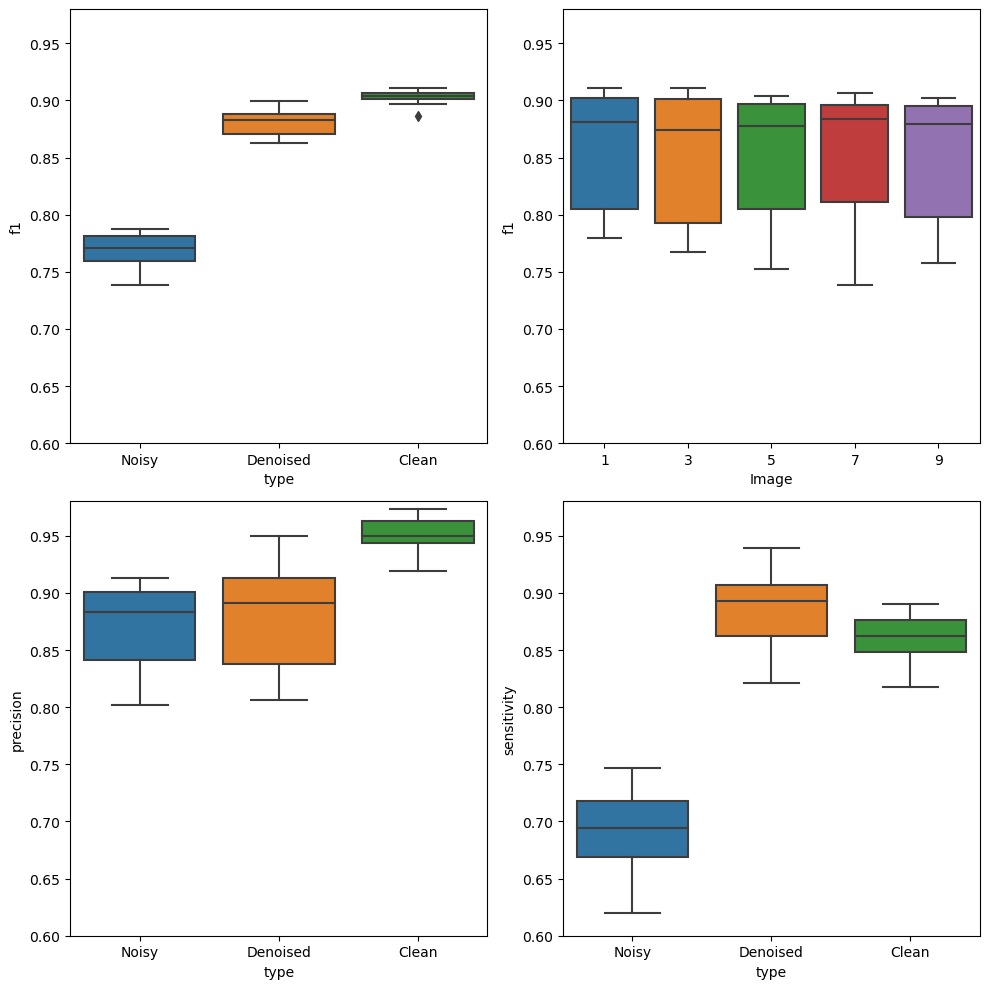

In [11]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

sns.boxplot(data=df_optimal,x='type',y='precision',ax = ax[2])
sns.boxplot(data=df_optimal,x='Image',y='f1',ax = ax[1])
sns.boxplot(data=df_optimal,x='type',y='f1',ax = ax[0])
sns.boxplot(data=df_optimal,x='type',y='sensitivity',ax = ax[3])

for a in ax:
    a.set_ylim(0.6,0.98)
# plt.ylim(0,1)
plt.tight_layout()
# plt.savefig('../results/plots/parameter_sweep_optimal_parameter_summary.png',dpi=300)

# 30mW laser power clean images

In [53]:
df_clean_30 =  format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/clean/final_hmax_clean.csv",50)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


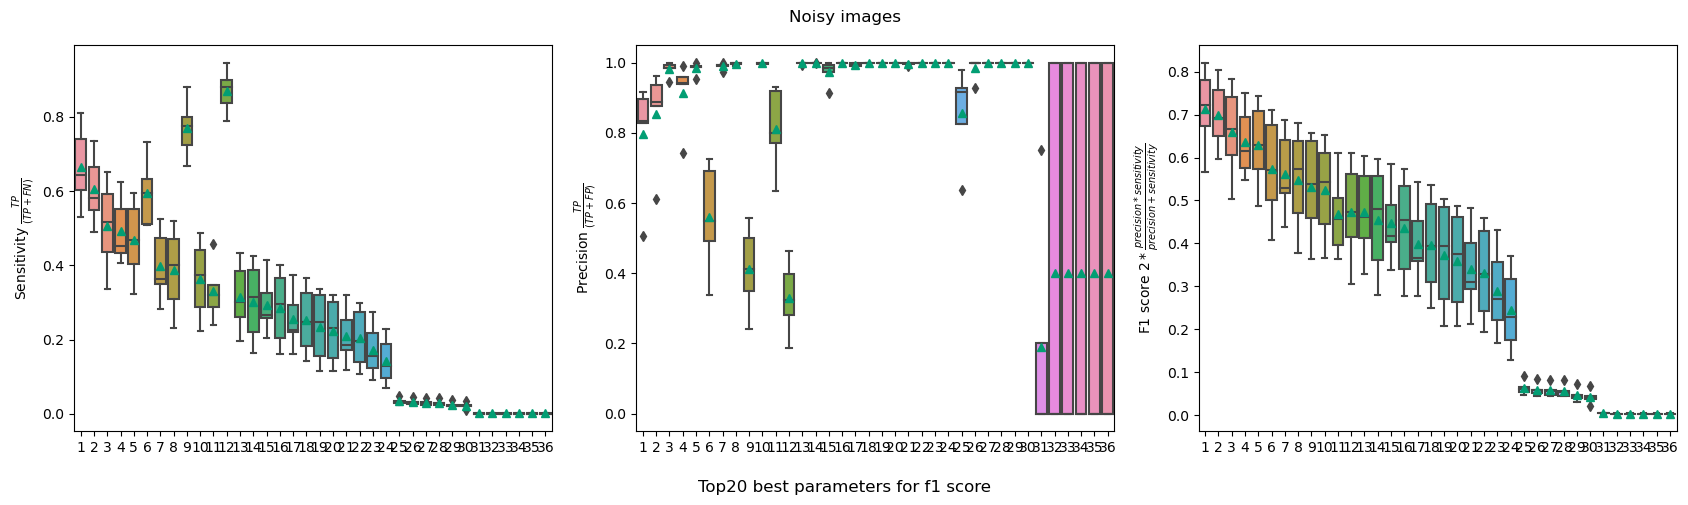

In [54]:
fig = plot_results(df_clean_30)
fig.suptitle('Noisy images')
plt.tight_layout()

In [60]:
df_denoised_30 =  format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/denoised/final_hmax_denoised.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


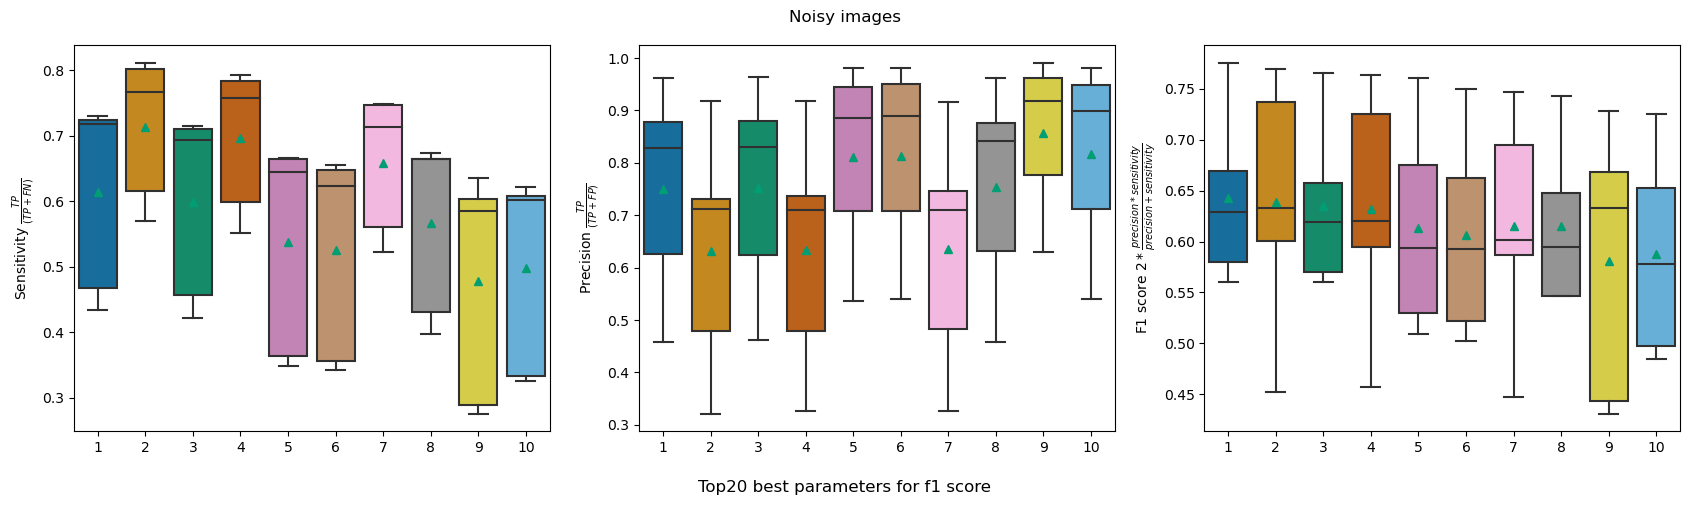

In [56]:
fig = plot_results(df_denoised_30)
fig.suptitle('Noisy images')
plt.tight_layout()

In [57]:
df_clean_30[df_clean_30.top ==  1]

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top
0,1,0,0.832804,0.005376,0.809671,0.006289,0.696729,n_2_threshold_0.5,2.0,0.5,0.821075,1.0,1
1,1,9,0.827679,0.003058,0.739824,0.005155,0.641327,n_2_threshold_0.5,2.0,0.5,0.781290,4.0,1
2,5,0,0.895722,0.004525,0.603604,0.025000,0.564706,n_2_threshold_0.5,2.0,0.5,0.721206,9.0,1
3,3,9,0.915385,0.004739,0.531250,0.043478,0.507431,n_2_threshold_0.5,2.0,0.5,0.672316,17.0,1
4,3,0,0.505636,0.005714,0.643443,0.003247,0.395729,n_2_threshold_0.5,2.0,0.5,0.566276,40.0,1


In [61]:
df_noisy_30 = format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/noisy/final_hmax_noisy.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


In [63]:
df_clean_opt = df_clean_30[(df_clean_30.top == 1)].copy()
df_denoised_opt = df_denoised_30[(df_denoised_30.top == 1)].copy()
df_noisy_opt = df_noisy_30[(df_noisy_30.top == 1)].copy()

for i,j in zip([df_clean_opt,df_noisy_opt,df_denoised_opt],['Clean','Noisy','Denoised']):
    i['type'] = [j]*len(i)


df_optimal = pd.concat([df_noisy_opt,df_denoised_opt,df_clean_opt])



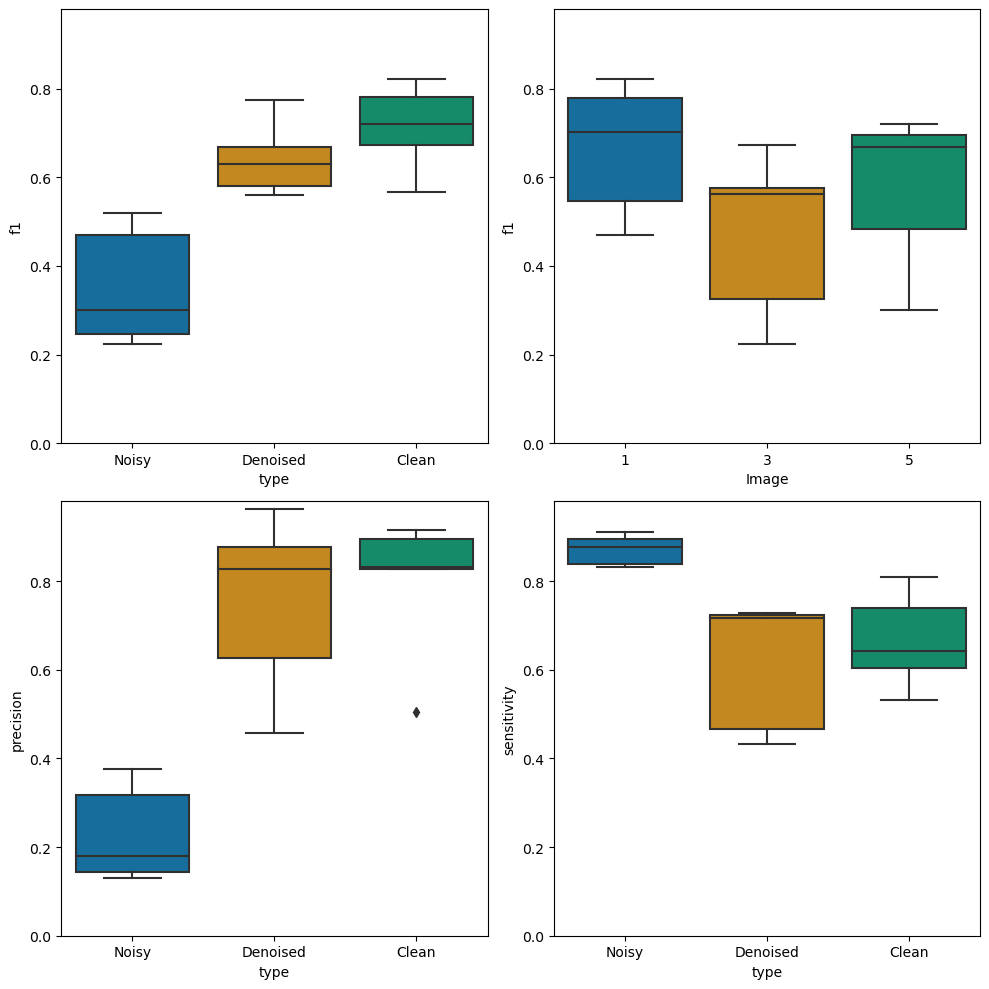

In [65]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

sns.boxplot(data=df_optimal,x='type',y='precision',ax = ax[2])
sns.boxplot(data=df_optimal,x='Image',y='f1',ax = ax[1])
sns.boxplot(data=df_optimal,x='type',y='f1',ax = ax[0])
sns.boxplot(data=df_optimal,x='type',y='sensitivity',ax = ax[3])

for a in ax:
    a.set_ylim(0,0.98)
# plt.ylim(0,1)
plt.tight_layout()

In [80]:
df_optimal[df_optimal.type == 'Denoised'].f1.mean()

0.6429564113962417

# 20 mW

In [66]:
df_denoised_20 =  format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/denoised/final_hmax_denoised.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


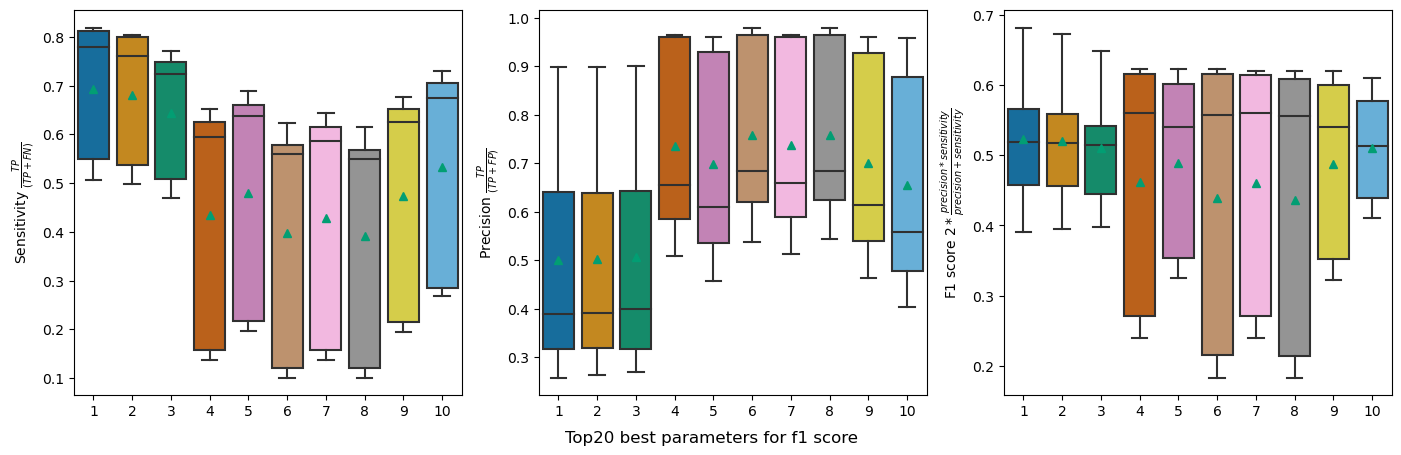

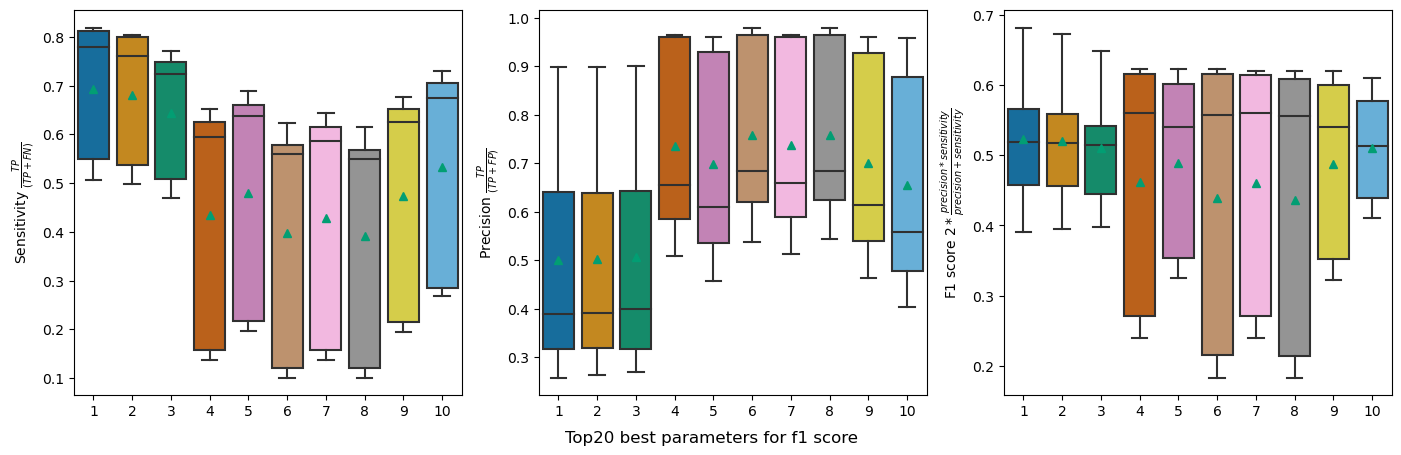

In [67]:
plot_results(df_denoised_20)

In [71]:
df_20_noisy = format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/noisy/final_hmax_noisy.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


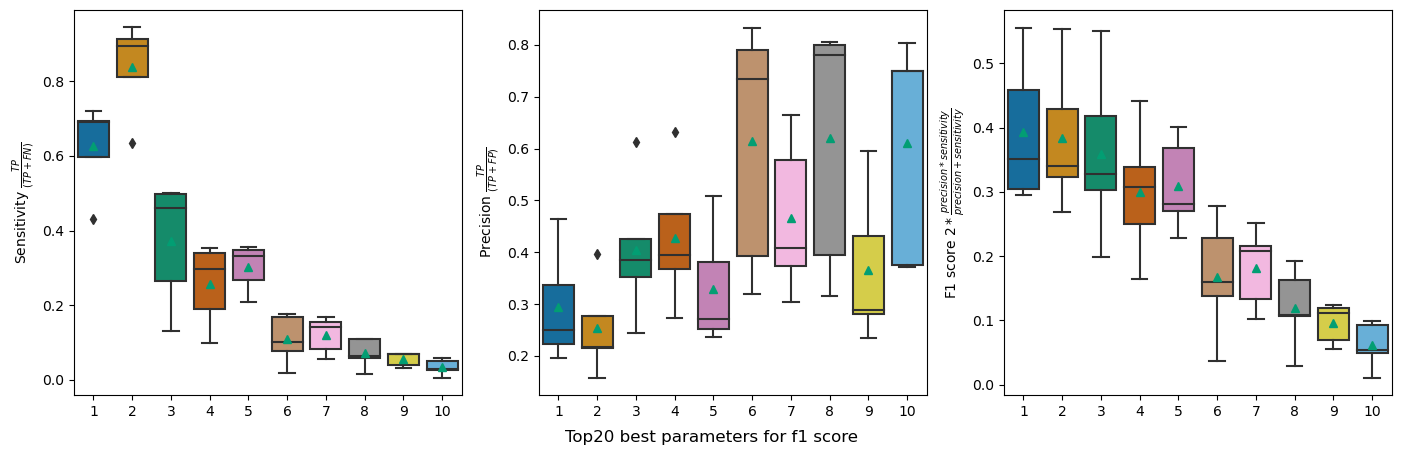

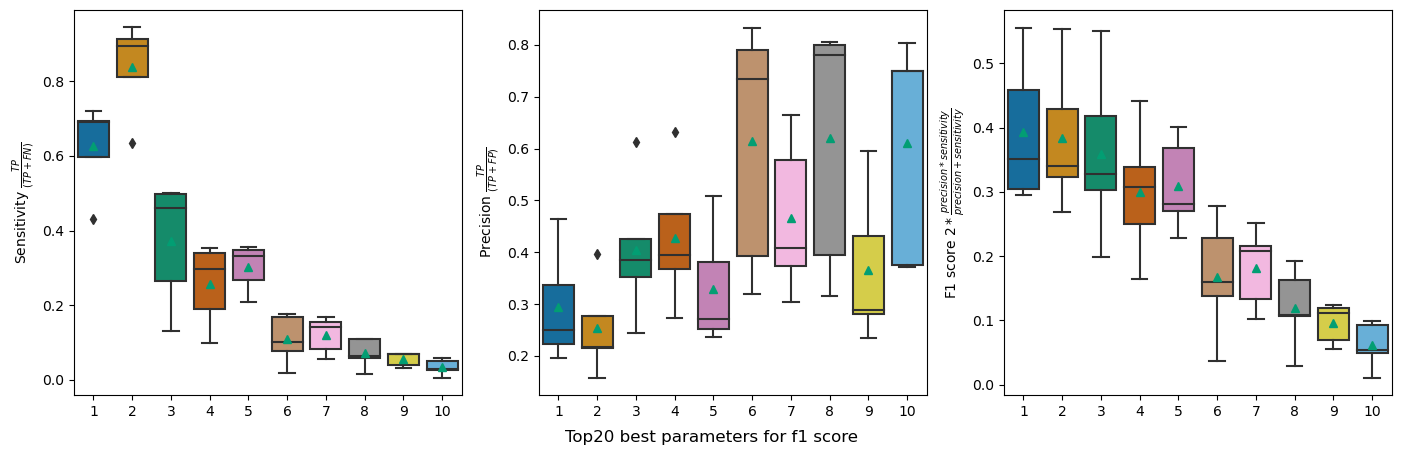

In [72]:
plot_results(df_20_noisy)

In [75]:
df_20_clean = format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/clean/final_hmax_clean.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


In [81]:
df_20_clean[df_20_clean.top == 1].f1.mean()

0.5569540328116426

In [83]:
df_denoised_20[df_denoised_20.top == 1].f1.mean()

0.5231139461229167

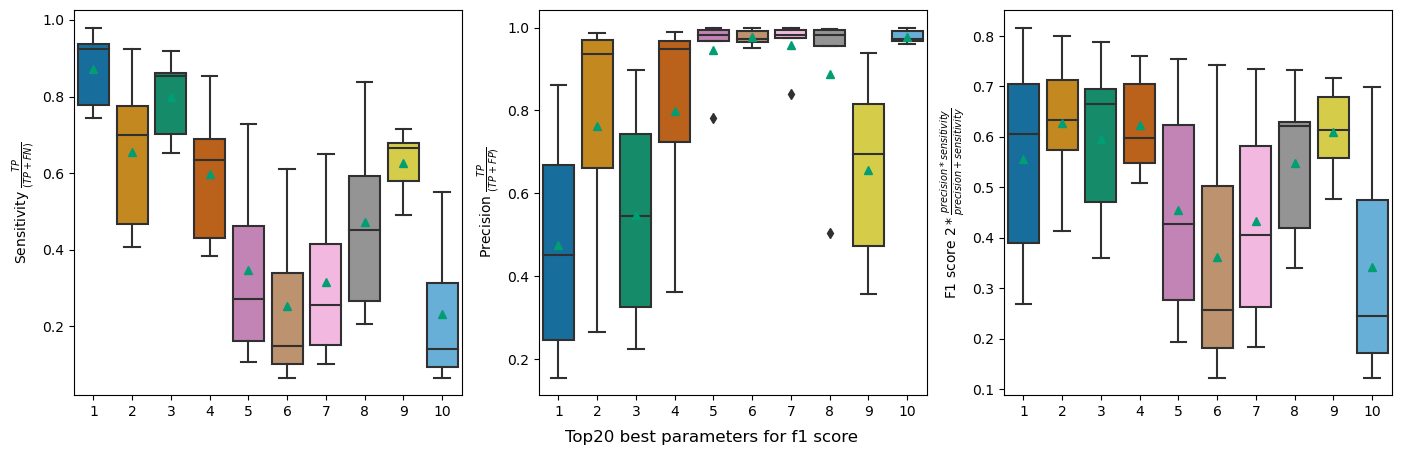

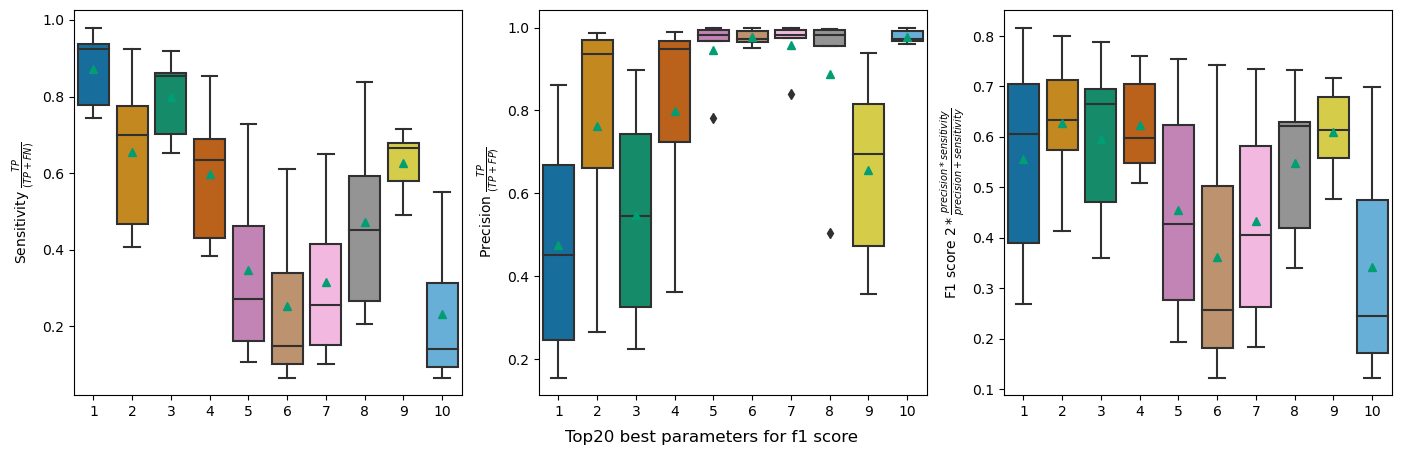

In [76]:
plot_results(df_20_clean)

In [89]:
df_denoised_20

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top
0,3,9,0.898802,0.001805,0.549674,0.012987,0.518008,n_1_threshold_0.5,1.0,0.5,0.682163,1.0,1
1,1,9,0.639810,0.003788,0.506567,0.006536,0.395044,n_1_threshold_0.5,1.0,0.5,0.565445,29.0,1
2,5,0,0.389674,0.005556,0.779828,0.001006,0.351411,n_1_threshold_0.5,1.0,0.5,0.519672,53.0,1
3,3,0,0.317089,0.009434,0.818966,0.000977,0.296758,n_1_threshold_0.5,1.0,0.5,0.457170,77.0,1
4,1,0,0.257623,0.010309,0.811765,0.000838,0.243545,n_1_threshold_0.5,1.0,0.5,0.391120,92.0,1
5,3,9,0.899183,0.001757,0.537459,0.013333,0.507291,n_1_threshold_0.4,1.0,0.4,0.672783,2.0,2
6,1,9,0.638554,0.003717,0.497186,0.006623,0.388889,n_1_threshold_0.4,1.0,0.4,0.559072,34.0,2
7,5,0,0.391524,0.005128,0.761378,0.001038,0.349099,n_1_threshold_0.4,1.0,0.4,0.517126,55.0,2
8,3,0,0.318463,0.008547,0.800000,0.001006,0.295426,n_1_threshold_0.4,1.0,0.4,0.455572,78.0,2
9,1,0,0.261981,0.009901,0.803922,0.000865,0.246699,n_1_threshold_0.4,1.0,0.4,0.395181,91.0,2


# 10 mW

In [90]:
df_10_clean = format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/clean/final_hmax_clean.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


In [97]:
df_10_clean

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top
0,7,9,0.861963,0.005435,0.821637,0.007353,0.726334,n_4_threshold_0.5,4.0,0.5,0.841317,1.0,1
1,7,0,0.986957,0.004292,0.494553,0.250000,0.492441,n_4_threshold_0.5,4.0,0.5,0.658926,33.0,1
2,5,9,0.993392,0.001546,0.411121,0.250000,0.410536,n_4_threshold_0.5,4.0,0.5,0.581560,45.0,1
3,9,0,0.990826,0.001172,0.112500,0.500000,0.113306,n_4_threshold_0.5,4.0,0.5,0.202058,94.0,1
4,9,9,1.000000,0.000944,0.051971,1.000000,0.052820,n_4_threshold_0.5,4.0,0.5,0.098807,103.0,1
5,3,9,0.880332,0.004587,0.773958,0.009804,0.700565,n_1_threshold_0.5,1.0,0.5,0.823725,2.0,2
6,5,0,0.977974,0.002217,0.596774,0.062500,0.589223,n_1_threshold_0.5,1.0,0.5,0.741235,18.0,2
7,1,0,0.505567,0.010101,0.910665,0.001022,0.481928,n_1_threshold_0.5,1.0,0.5,0.650179,35.0,2
8,3,0,0.308706,0.050000,0.981481,0.000443,0.307130,n_1_threshold_0.5,1.0,0.5,0.469683,62.0,2
9,1,9,0.212756,0.076923,0.973856,0.000604,0.211921,n_1_threshold_0.5,1.0,0.5,0.349219,82.0,2


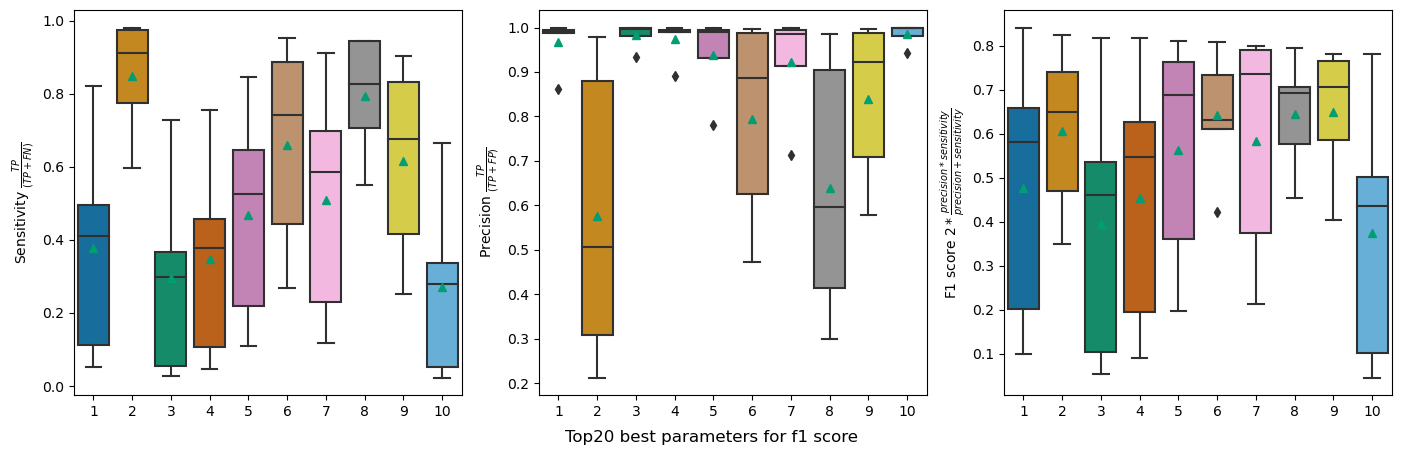

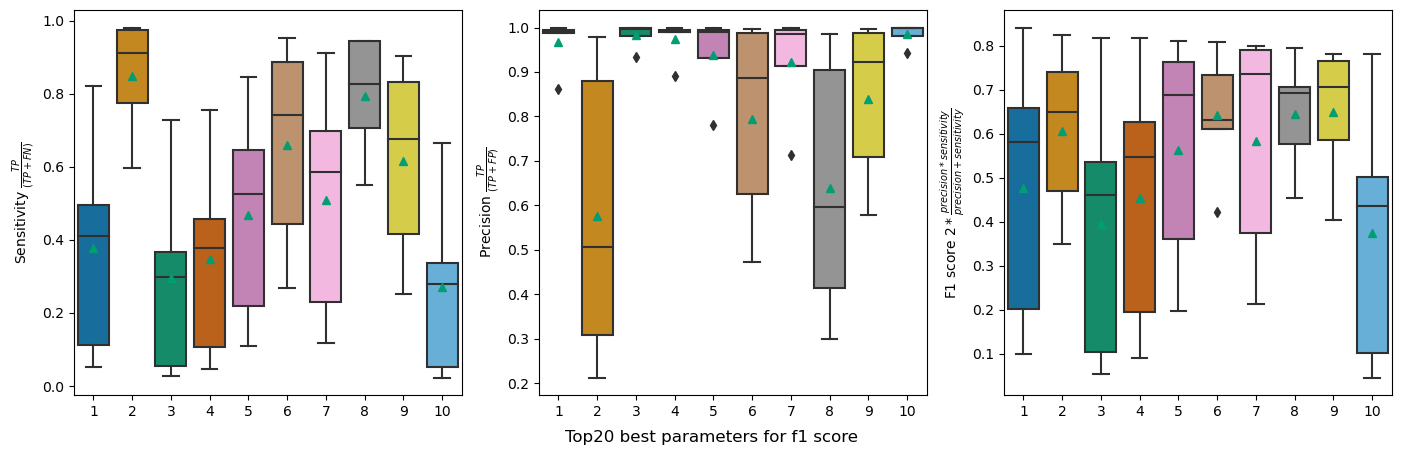

In [91]:
plot_results(df_10_clean)

In [98]:
df_10_denoised = format_truth_table("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/denoised/final_hmax_denoised.csv",10)

/scratch/louaness/ipykernel_200456/2822042736.py:18: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))


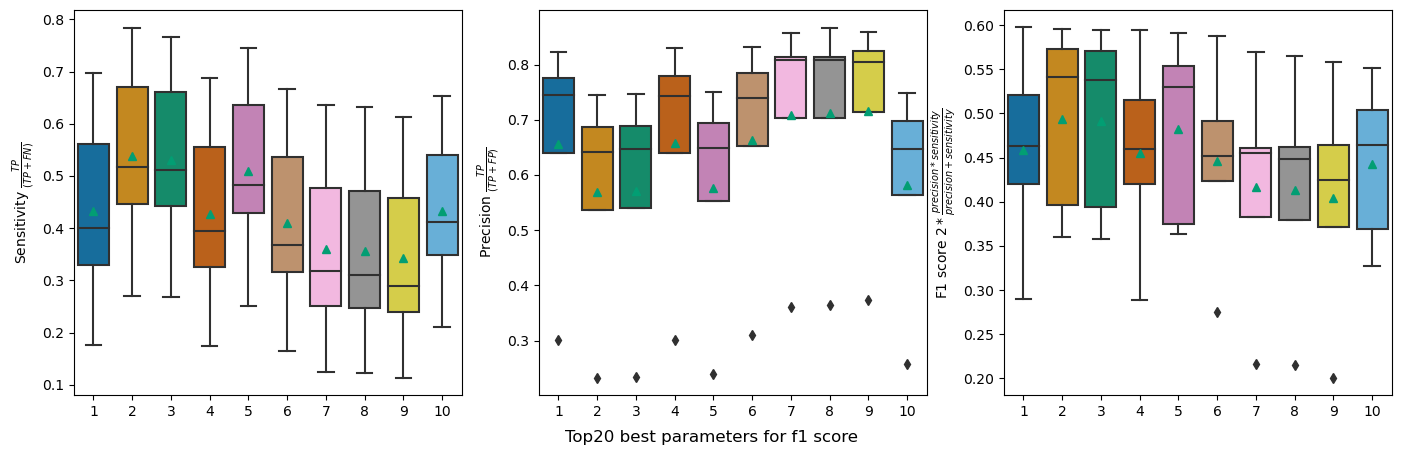

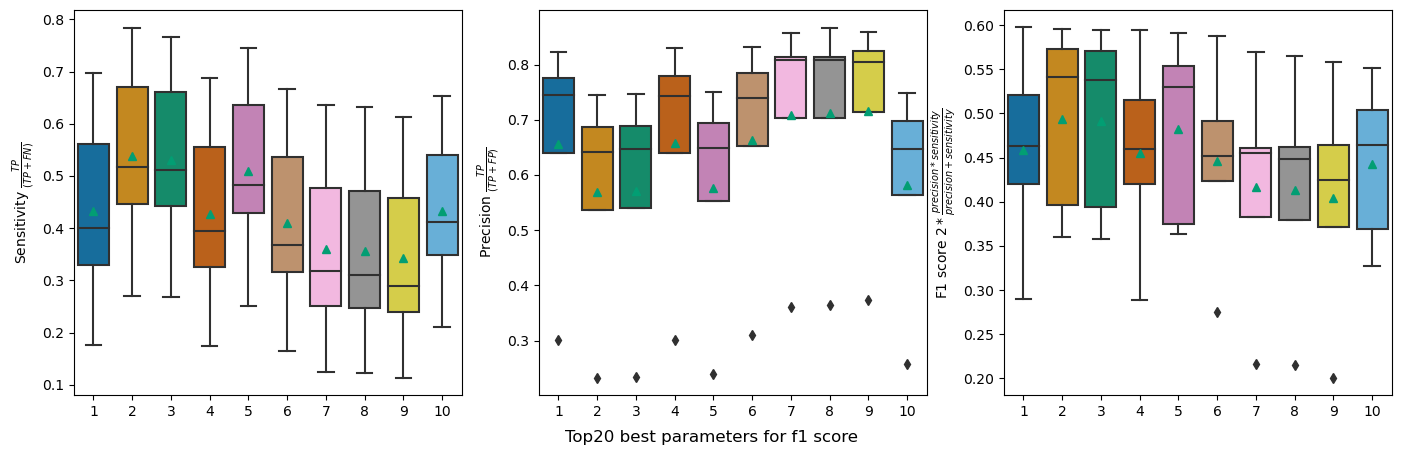

In [99]:
plot_results(df_10_denoised)

In [100]:
df_10_denoised

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,n,threshold,f1,ranking,top
0,3,0,0.639600,0.002212,0.560429,0.003077,0.426351,n_2_threshold_0.5,2.0,0.5,0.597403,1.0,1
1,1,0,0.744501,0.001520,0.401094,0.006579,0.353082,n_2_threshold_0.5,2.0,0.5,0.521327,21.0,1
2,3,9,0.775061,0.001553,0.330208,0.010753,0.301994,n_2_threshold_0.5,2.0,0.5,0.463112,44.0,1
3,1,9,0.300469,0.007143,0.697168,0.001340,0.266390,n_2_threshold_0.5,2.0,0.5,0.419948,60.0,1
4,5,0,0.823529,0.001086,0.175627,0.023256,0.169974,n_2_threshold_0.5,2.0,0.5,0.289513,91.0,1
5,3,0,0.537138,0.002941,0.669591,0.001686,0.424954,n_1_threshold_0.5,1.0,0.5,0.596095,2.0,2
6,1,0,0.642534,0.001887,0.517776,0.003155,0.402405,n_1_threshold_0.5,1.0,0.5,0.573448,7.0,2
7,3,9,0.686400,0.001880,0.446875,0.005076,0.371651,n_1_threshold_0.5,1.0,0.5,0.541325,15.0,2
8,5,0,0.745050,0.001225,0.269713,0.009615,0.247541,n_1_threshold_0.5,1.0,0.5,0.396053,65.0,2
9,1,9,0.233312,0.010000,0.784314,0.000845,0.219720,n_1_threshold_0.5,1.0,0.5,0.359640,78.0,2


In [101]:
df_10_denoised_m = df_10_denoised.groupby('param').mean()

In [103]:
df_10_denoised_m['top'] = df_10_denoised_m['f1'].rank(method='first',ascending=False)

In [104]:
df_10_denoised_m

,Image,Frame,precision,negative_predicted_value,sensitivity,specificity,accuracy,n,threshold,f1,ranking,top
param,,,,,,,,,,,,
n_1_threshold_0.2,7.4,5.4,0.582709,0.002528,0.432637,0.005376,0.288957,1.0,0.2,0.443262,47.6,7.0
n_1_threshold_0.3,7.4,5.4,0.577027,0.003184,0.508588,0.004479,0.323657,1.0,0.3,0.482627,36.8,3.0
n_1_threshold_0.4,2.6,3.6,0.571381,0.003414,0.529737,0.004171,0.331397,1.0,0.4,0.491249,34.6,2.0
n_1_threshold_0.5,2.6,3.6,0.568887,0.003587,0.537654,0.004075,0.333254,1.0,0.5,0.493312,33.4,1.0
n_2_threshold_0.3,7.4,5.4,0.663945,0.002525,0.410509,0.010014,0.293048,2.0,0.3,0.445974,47.8,6.0
n_2_threshold_0.4,7.4,5.4,0.658760,0.002651,0.427522,0.009330,0.301002,2.0,0.4,0.455421,45.6,5.0
n_2_threshold_0.5,2.6,3.6,0.656632,0.002703,0.432905,0.009001,0.303558,2.0,0.5,0.458260,43.4,4.0
n_3_threshold_0.3,2.6,3.6,0.715001,0.002208,0.342529,0.017137,0.260477,3.0,0.3,0.403942,60.0,10.0
n_3_threshold_0.4,7.4,5.4,0.711387,0.002289,0.356623,0.016536,0.268041,3.0,0.4,0.413768,57.6,9.0


In [113]:
df_test = pd.read_csv("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/denoised/final_hmax_denoised.csv")

In [114]:
f1  = np.array(2*((df_test.precision.values*df_test.sensitivity.values)/(df_test.precision.values+df_test.sensitivity.values)))

df_test['f1'] = f1

df_test 

/scratch/louaness/ipykernel_200456/2599934715.py:1: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_test.precision.values*df_test.sensitivity.values)/(df_test.precision.values+df_test.sensitivity.values)))


,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,f1
0,0,0,0.941924,0.002203,0.533951,0.030303,0.517413,n_5_threshold_0.4,0.681550
1,1,1,0.988281,0.000999,0.201915,0.250000,0.202068,n_5_threshold_0.4,0.335321
2,2,2,0.704057,0.005155,0.604508,0.008000,0.482871,n_5_threshold_0.4,0.650496
3,3,3,0.978723,0.002801,0.205357,0.333333,0.206208,n_5_threshold_0.4,0.339483
4,4,4,0.842105,0.003731,0.518919,0.018182,0.473770,n_5_threshold_0.4,0.642140
...,...,...,...,...,...,...,...,...,...
175,0,0,0.909256,0.002119,0.515432,0.019608,0.490714,n_3_threshold_0.2,0.657912
176,1,1,0.983696,0.001121,0.288907,0.142857,0.288095,n_3_threshold_0.2,0.446638
177,2,2,0.524838,0.004065,0.497951,0.004525,0.344147,n_3_threshold_0.2,0.511041
178,3,3,0.946970,0.003086,0.279018,0.125000,0.276316,n_3_threshold_0.2,0.431034


In [115]:
df_test = df_test.groupby('param').mean()

In [116]:
df_test['top'] = df_test['f1'].rank(method='first',ascending=False)

In [117]:
df_test = df_test.sort_values(by='top')

In [118]:
df_test

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,f1,top
param,,,,,,,,,
n_2_threshold_0.5,2.0,2.0,0.750590,0.004578,0.614123,0.018145,0.479343,0.642956,1.0
n_1_threshold_0.5,2.0,2.0,0.632327,0.006074,0.713048,0.006131,0.479101,0.638405,2.0
n_2_threshold_0.4,2.0,2.0,0.751475,0.004367,0.599423,0.018859,0.469877,0.634510,3.0
n_1_threshold_0.4,2.0,2.0,0.634207,0.005706,0.696972,0.006310,0.471726,0.632284,4.0
n_2_threshold_0.3,2.0,2.0,0.754240,0.003949,0.566229,0.019849,0.449643,0.615594,5.0
n_1_threshold_0.3,2.0,2.0,0.636044,0.004939,0.658071,0.006629,0.453046,0.615559,6.0
n_3_threshold_0.5,2.0,2.0,0.811539,0.003769,0.537192,0.044444,0.450154,0.613625,7.0
n_3_threshold_0.4,2.0,2.0,0.813694,0.003642,0.524955,0.046875,0.441903,0.606028,8.0
n_3_threshold_0.3,2.0,2.0,0.816215,0.003399,0.498044,0.049672,0.423044,0.587720,9.0


# cleaner way to rank the best parameters

In [4]:
def format_truth_table_avg(file,max_rank):
    df = pd.read_csv(file)
    f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
    df['f1'] = f1
    df = df.groupby('param').mean()
    df['top'] = df['f1'].rank(method='first',ascending=False)
    df = df.sort_values(by='top')
    df = df[df.top <= max_rank]
    df_all = pd.read_csv(file)
    df_all['f1'] = f1
    df_all = df_all[df_all.param == df.index[0]]

    return df,df_all

In [124]:
df_best_30,df_all_30 = format_truth_table_avg("/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/denoised/final_hmax_denoised.csv",1)

/scratch/louaness/ipykernel_200456/2766867344.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))


In [125]:
df_best_30

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,f1,top
param,,,,,,,,,
n_2_threshold_0.5,2.0,2.0,0.75059,0.004578,0.614123,0.018145,0.479343,0.642956,1.0


In [123]:
df_all_30

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,param
160,0,0,0.828271,0.003788,0.729424,0.006757,0.633929,n_2_threshold_0.5
161,1,1,0.962233,0.001497,0.467678,0.041667,0.459671,n_2_threshold_0.5
162,2,2,0.457847,0.007353,0.723361,0.002387,0.390298,n_2_threshold_0.5
163,3,3,0.877828,0.003922,0.433036,0.035714,0.409664,n_2_threshold_0.5
164,4,4,0.626772,0.006329,0.717117,0.004202,0.503153,n_2_threshold_0.5


In [159]:
file_list = ["../results/final/clean/final_hmax_clean.csv",
"../results/final/denoised/final_hmax_denoised.csv",
"../results/final/noisy/final_hmax_noisy.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/noisy/final_hmax_noisy.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/noisy/final_hmax_noisy.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/noisy/final_hmax_noisy.csv"]

name = ['clean','denoised','noisy']*int(len(file_list)/3)

lp = sorted(['40mW','30mW','20mW','10mW']*int(len(file_list)/4),reverse=True)

df_opt = pd.DataFrame()

for file in file_list:
    _,df = format_truth_table_avg(file,10)
    df['type'] = [name[file_list.index(file)]]*len(df)
    df['laser_power'] = [lp[file_list.index(file)]]*len(df)
    df_opt = pd.concat([df_opt,df])

/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.s

In [142]:
name[file_list.index(file)]

'clean'

In [160]:
df_opt

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,f1,type,laser_power
200,0,0,0.939548,0.005848,0.883562,0.011905,0.836140,n_2_threshold_0.5,0.910695,clean,40mW
201,1,1,0.919118,0.007143,0.890032,0.010000,0.825513,n_2_threshold_0.5,0.904341,clean,40mW
202,2,2,0.946657,0.005291,0.870166,0.013889,0.829605,n_2_threshold_0.5,0.906801,clean,40mW
203,3,3,0.946264,0.006369,0.878410,0.015385,0.836795,n_2_threshold_0.5,0.911075,clean,40mW
204,4,4,0.966790,0.004115,0.844072,0.021739,0.820401,n_2_threshold_0.5,0.901273,clean,40mW
...,...,...,...,...,...,...,...,...,...,...,...
110,0,0,0.411489,0.002525,0.639927,0.000995,0.334443,n_1_threshold_0.4,0.500892,noisy,10mW
111,1,1,0.204023,0.009524,0.773420,0.000722,0.192954,n_1_threshold_0.4,0.322874,noisy,10mW
112,2,2,0.389893,0.005376,0.819688,0.000759,0.359368,n_1_threshold_0.4,0.528432,noisy,10mW
113,3,3,0.360326,0.003356,0.690625,0.000849,0.310571,n_1_threshold_0.4,0.473571,noisy,10mW


In [161]:
df_opt.param.unique()

array(['n_2_threshold_0.5', 'n_1_threshold_0.4', 'n_1_threshold_0.3',
       'n_1_threshold_0.5'], dtype=object)

In [165]:
df_opt_laser = df_opt.groupby(['laser_power','param']).mean()

/scratch/louaness/ipykernel_200456/3857156242.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_opt_laser = df_opt.groupby(['laser_power','param']).mean()


In [166]:
df_opt_laser

Unnamed: 0.1  Unnamed: 0  precision  \
laser_power param                                                    
10mW        n_1_threshold_0.3           2.0         2.0   0.743920   
            n_1_threshold_0.4           2.0         2.0   0.348162   
            n_1_threshold_0.5           2.0         2.0   0.568887   
20mW        n_1_threshold_0.4           2.0         2.0   0.293499   
            n_2_threshold_0.5           2.0         2.0   0.678909   
30mW        n_2_threshold_0.5           2.0         2.0   0.630167   
40mW        n_2_threshold_0.5           4.5         4.5   0.899984   

                               negative_predicted_value  sensitivity  \
laser_power param                                                      
10mW        n_1_threshold_0.3                  0.004446     0.663644   
            n_1_threshold_0.4                  0.004545     0.692617   
            n_1_threshold_0.5                  0.003587     0.537654   
20mW        n_1_threshold_0.4                  0.004184     0.627128   
            n_2_threshold_0.5                  0.006658     0.627717   
30mW        n_2_threshold_0.5                  0.004140     0.587399   
40mW        n_2_threshold_0.5                  0.004862     0.812658   

                               specificity  accuracy        f1  
laser_power param                                               
10mW        n_1_threshold_0.3     0.027832  0.499302  0.662857  
            n_1_threshold_0.4     0.000864  0.296354  0.453651  
            n_1_threshold_0.5     0.004075  0.333254  0.493312  
20mW        n_1_threshold_0.4     0.000954  0.250024  0.393011  
            n_2_threshold_0.5     0.032477  0.413440  0.575469  
30mW        n_2_threshold_0.5     0.012128  0.425599  0.577489  
40mW        n_2_threshold_0.5     0.010511  0.745318  0.850969

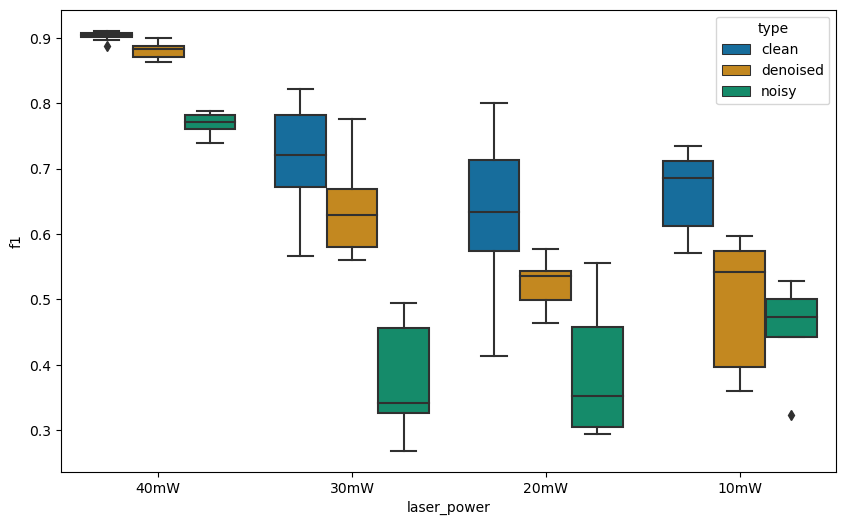

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x="laser_power", y="f1", hue="type", data=df_opt)
plt.savefig('../results/plots/laser_power_effect.png',dpi=300)

In [156]:
file_list = ["/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/30mW/final/noisy/final_hmax_noisy.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/20mW/final/noisy/final_hmax_noisy.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/clean/final_hmax_clean.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/denoised/final_hmax_denoised.csv",
"/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/low_laser_power/10mW/final/noisy/final_hmax_noisy.csv"]

name = ['clean','denoised','noisy']*int(len(file_list)/3)

lp = sorted(['30mW','20mW','10mW']*int(len(file_list)/3),reverse=True)

df_opt = pd.DataFrame()

for file in file_list:
    _,df = format_truth_table_avg(file,10)
    df['type'] = [name[file_list.index(file)]]*len(df)
    df['laser_power'] = [lp[file_list.index(file)]]*len(df)
    df_opt = pd.concat([df_opt,df])

/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.sensitivity.values)/(df.precision.values+df.sensitivity.values)))
/scratch/louaness/ipykernel_200456/624320456.py:3: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df.precision.values*df.s

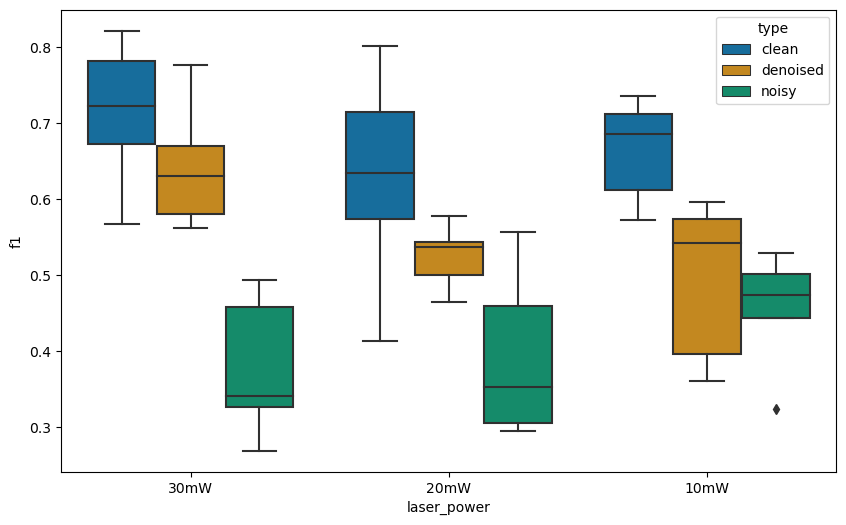

In [158]:
plt.figure(figsize=(10,6))
sns.boxplot(x="laser_power", y="f1", hue="type", data=df_opt)
plt.savefig('../results/plots/laser_power_effect_30_20_10.png',dpi=300)

In [3]:
# DNA channel 

In [20]:
df_best_dna, df_all_dna = format_truth_table_avg('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/H_max/results/dna/final/denoised/final_hmax_noisy.csv',10)

In [21]:
df_best_dna

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,f1,top
param,,,,,,,,,
n_4_threshold_0.2,4.5,4.5,0.710609,0.042503,0.718522,0.104426,0.503127,0.655226,1.0
n_5_threshold_0.2,4.5,4.5,0.765965,0.035808,0.669845,0.185155,0.499254,0.654366,2.0
n_5_threshold_0.25,4.5,4.5,0.727666,0.127954,0.728962,0.172969,0.506049,0.653011,3.0
n_3_threshold_0.2,4.5,4.5,0.648010,0.048567,0.776350,0.079879,0.503762,0.650656,4.0
n_4_threshold_0.25,4.5,4.5,0.670019,0.140857,0.783791,0.097322,0.506189,0.649689,5.0
n_5_threshold_0.3,4.5,4.5,0.703352,0.133995,0.746776,0.159865,0.497846,0.642417,6.0
n_5_threshold_0.35,4.5,4.5,0.689656,0.144869,0.765421,0.147778,0.497882,0.639386,7.0
n_6_threshold_0.25,4.5,4.5,0.762378,0.123196,0.677520,0.193421,0.487984,0.637064,8.0
n_3_threshold_0.25,4.5,4.5,0.599241,0.166443,0.851660,0.073479,0.499678,0.636909,9.0


In [22]:
df_all_dna

,Unnamed: 0.1,Unnamed: 0,precision,negative_predicted_value,sensitivity,specificity,accuracy,param,f1
670,0,0,0.504808,0.037037,0.801527,0.009615,0.451064,n_4_threshold_0.2,0.619469
671,1,1,0.896226,0.024390,0.703704,0.083333,0.653061,n_4_threshold_0.2,0.788382
672,2,2,0.983333,0.016949,0.504274,0.500000,0.504202,n_4_threshold_0.2,0.666667
673,3,3,0.211931,0.200000,0.971223,0.001988,0.211838,n_4_threshold_0.2,0.347938
674,4,4,0.890000,0.019231,0.635714,0.083333,0.592105,n_4_threshold_0.2,0.741667
675,5,5,0.786260,0.022222,0.700680,0.034483,0.590909,n_4_threshold_0.2,0.741007
676,6,6,0.875000,0.017544,0.652174,0.062500,0.598870,n_4_threshold_0.2,0.747331
677,7,7,0.311688,0.050000,0.883436,0.003135,0.300830,n_4_threshold_0.2,0.460800
678,8,8,0.968085,0.014925,0.579618,0.250000,0.571429,n_4_threshold_0.2,0.725100
679,9,9,0.678756,0.022727,0.752874,0.015873,0.556962,n_4_threshold_0.2,0.713896
